# STORE CUSTOMER CLTV ANALYSIS & MODEL TRAINING

## What will you learn from this project?
* Data Reading
* Data Cleaning
* Data Preparation
* CLTV Analysis
    * Customer Lifetime Value
* BG/NBD Model
* Gamma Gamma Submodel
* Segmentation
* CLTV Prediction with Time Projection 

## Introduction
* ***Customer Lifetime Value (CLTV):*** is considered to be the monetary value that a customer will bring to a company during its relationship and communication with that company.

* CLTV Prediction with Time Projection:
    > CLTV = Expected Number of Purchases x Expected Profit Margin
    
    As a result of this model, we can calculate the expected average profit and the expected number of transactions for each person by reducing the general behavioural characteristics of the crowd to each individual and asking the individual characteristics to the model. With the multiplication of these values, the CLTV value can be developed and the CLTV calculation can be performed for each individual by using a time-projected, conditional expected expression, in a way to accommodate the characteristics of the general mass carried by the conditional expected expression.
    > CLTV = BG/NBD Model x Gamma Gamma Model

* ***BG/NBD Model:*** It is a probabilistic model that is also used as a stand-alone sales forecasting model. BG/NBD probabilistically models two processes for the expected number of transactions:
    * The purchase Process: 
        - It is the modelling of the purchasing process. In this context, the number of transactions to be performed by a customer in a given time period is distributed possionally with the transaction rate parameter. 
        - A user will continue to make random purchases around its transaction rate for as long as it is alive.
        - Transaction rates vary for each customer and are gamma-distributed for the whole population.
    * Dropout Process (Churn): 
        - Modelling the process by which the user leaves the brand.
        - Each customer has a dropout rate (dropout probability) with probability p.
        - A customer drops with a certain probability after shopping.
        - The dropout rate varies for each customer and is beta distributed for the entire audience.

* ***Gamma-Gamma Model:*** It is used to estimate how much profit a customer can generate on average per transaction, and the monetary value of the customer's transactions is randomly distributed around the average of their transaction values.

<a id="content"></a>
## Analysis Content
1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Read & Analyse Data](#3)
4. [Data Distributions](#4)
5. [Data Preprocessing](#5)
6. [Data Preprocessing (Suppression)](#6)
7. [Data Preparation](#7)
8. [Lifetime Data Structure Preparation](#8)
9. [BG-NBD Model Setup](#9)
10. [Gamma Gamma Model Setup](#10)
11. [CLTV Calculation with BG-NBD & GG Model ](#11)
12. [CLTV Segmentation](#12)
13. [Conclusion](#13)

<a id='1'></a>
## Python Libraries
---
> Back to [Main Content](#content)
<br>
> Next [Content](#2)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import numpy as np
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install lifetimes
import lifetimes
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

/kaggle/input/online-retail-ii/online_retail_II.xlsx
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.1 MB/s eta 0:00:00


<a id='2'></a>
## Data Content
* This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.
    
    * ***InvoiceNo:*** Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 
    * ***StockCode:*** Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 
    * ***Description:*** Product (item) name. Nominal. 
    * ***Quantity:*** The quantities of each product (item) per transaction. Numeric.	
    * ***InvoiceDate:*** Invice date and time. Numeric. The day and time when a transaction was generated. 
    * ***UnitPrice:*** Unit price. Numeric. Product price per unit in sterling (Â£). 
    * ***CustomerID:*** Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. 
    * ***Country:*** Country name. Nominal. The name of the country where a customer resides.

* Online Retail II Official Website: https://archive.ics.uci.edu/dataset/502/online+retail+ii
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#1)
<br>
> Next [Content](#3)

<a id='3'></a>
## Read & Analyse Data
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#2)
<br>
> Next [Content](#4)

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# Read Data
df = pd.read_excel("/kaggle/input/online-retail-ii/online_retail_II.xlsx", sheet_name="Year 2010-2011")

In [4]:
df_retail = df.copy()
# Show five row of data
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom


In [5]:
# Describe basic statistics of data
df_retail.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,541910.000,541910,541910.000,406830.000
mean,9.552,2011-07-04 13:35:22.342307584,4.611,15287.684
min,-80995.000,2010-12-01 08:26:00,-11062.060,12346.000
25%,1.000,2011-03-28 11:34:00,1.250,13953.000
50%,3.000,2011-07-19 17:17:00,2.080,15152.000
75%,10.000,2011-10-19 11:27:00,4.130,16791.000
max,80995.000,2011-12-09 12:50:00,38970.000,18287.000
std,218.081,NaN,96.760,1713.603


In [6]:
# Information about data
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


<a id='4'></a>
## Data Distributions
* Unique Values
* Distribution of Remaining Features
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#3)
<br>
> Next [Content](#5)

In [7]:
# Null Values
df_retail.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [8]:
# Description: Product (item) name. Nominal
# Nunique Value for Description
df_retail["Description"].nunique()

4223

In [9]:
# Description: Product (item) name. Nominal
# Item Count
df_retail.groupby("Description").agg({"Quantity":"sum"}).head()

,Quantity
Description,
20713,-400
4 PURPLE FLOCK DINNER CANDLES,144
50'S CHRISTMAS GIFT BAG LARGE,1913
DOLLY GIRL BEAKER,2448
I LOVE LONDON MINI BACKPACK,389


<a id='5'></a>
## Data Preprocessing
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#4)
<br>
> Next [Content](#6)

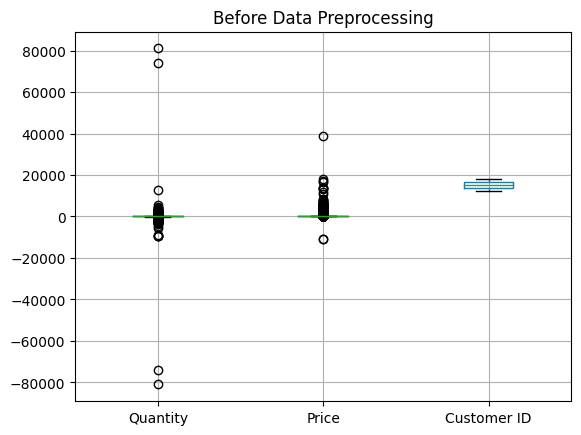

In [10]:
plt.title("Before Data Preprocessing")
df_retail.boxplot()
plt.show()

In [11]:
df_retail.dropna(inplace=True)
df_retail = df_retail[~df_retail["Invoice"].str.contains("C", na=False)]
df_retail = df_retail[df_retail["Quantity"] > 0]
df_retail = df_retail[df_retail["Price"] > 0]

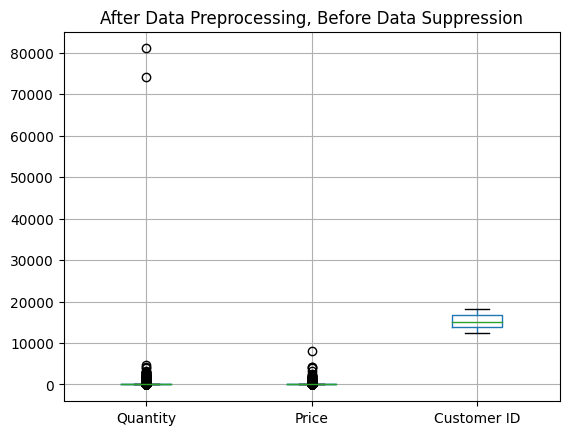

In [12]:
plt.title("After Data Preprocessing, Before Data Suppression")
df_retail.boxplot()
plt.show()

<a id='6'></a>
## Data Preprocessing (Suppression)
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#5)
<br>
> Next [Content](#7)  

In [13]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.001)
    quartile3 = dataframe[variable].quantile(0.999)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    
    return low_limit, up_limit

In [14]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [15]:
# Upload dataset with Data Suppression
replace_with_thresholds(df_retail, "Quantity")
replace_with_thresholds(df_retail, "Price")

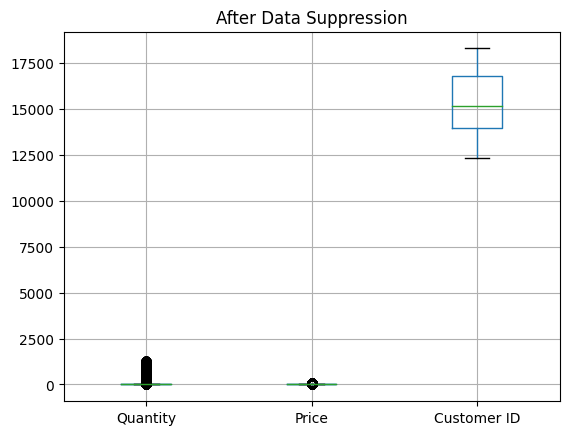

In [16]:
plt.title("After Data Suppression")
df_retail.boxplot()
plt.show()

<a id='7'></a>
## Data Preparation
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#6)
<br>
> Next [Content](#8)  

In [17]:
# Create Total Price
df_retail["TotalPrice"] = df_retail["Quantity"] * df_retail["Price"]

In [18]:
# Create Datetime Value
today_date = dt.datetime(2011,12,11)

<a id='8'></a>
## Lifetime Data Structure Preparation 
* Recency: Time elapsed since the last purchase. Weekly (user specific)
* T: Age of the customer. Weekly (how long before the date of the analysis was the first purchase)
* Frequency: Total number of repeat purchases (frequency > 1)
* Monetary: Average earnings per purchase
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#7)
<br>
> Next [Content](#9)  

In [19]:
cltv = df_retail.groupby("Customer ID").agg({"InvoiceDate": [lambda date: (date.max() - date.min()).days,
                                                             lambda date: (today_date - date.min()).days],
                                             "Invoice": lambda num: num.nunique(),
                                             "TotalPrice": lambda price: price.sum()})

cltv.columns = cltv.columns.droplevel(0)
cltv.columns = ["Recency", "T", "Frequency", "Monetary"]
cltv.index = cltv.index.astype(int)

In [20]:
# Average Monetary
cltv["Monetary"] = cltv["Monetary"] / cltv["Frequency"]

# Frequency > 1
cltv = cltv[cltv["Frequency"] > 1]

# Weekly Recency
cltv["Recency"] = cltv["Recency"] / 7

# Weekly T
cltv["T"] = cltv["T"] / 7

In [21]:
cltv.head()

,Recency,T,Frequency,Monetary
Customer ID,,,,
12347,52.143,52.571,7,615.714
12348,40.286,51.286,4,449.310
12352,37.143,42.429,8,247.421
12356,43.143,46.571,3,937.143
12358,21.286,21.571,2,584.030


<a id='9'></a>
## BG-NBD Model Setup 
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#8)
<br>
> Next [Content](#10)  

In [22]:
# BG-NBD Model
bgf = BetaGeoFitter(penalizer_coef=0.001)

bgf.fit(cltv["Frequency"],
        cltv["Recency"],
        cltv["T"])

<lifetimes.BetaGeoFitter: fitted with 2845 subjects, a: 0.12, alpha: 11.41, b: 2.49, r: 2.18>

In [23]:
# Who are the top 10 customers we expect to buy from in 1 week?

# Answer 1
bgf.conditional_expected_number_of_purchases_up_to_time(1, # 1 weekly
                                                        cltv["Frequency"],
                                                        cltv["Recency"],
                                                        cltv["T"]).sort_values(ascending=False).head(10)
# or Answer 2
bgf.predict(1, # 1 weekly
            cltv["Frequency"],
            cltv["Recency"],
            cltv["T"]).sort_values(ascending=False).head(10)

Customer ID
12748   3.250
14911   3.126
17841   1.940
13089   1.537
14606   1.464
15311   1.434
12971   1.357
14646   1.206
13408   0.986
18102   0.969
dtype: float64

In [24]:
# Expected number of sales in 1 week
cltv["Expected_purc_1_week"] = bgf.predict(1, # 1 weekly
            cltv["Frequency"],
            cltv["Recency"],
            cltv["T"])

# Expected number of sales in 1 month
cltv["Expected_purc_1_month"] = bgf.predict(4, # 1 monthly
            cltv["Frequency"],
            cltv["Recency"],
            cltv["T"])

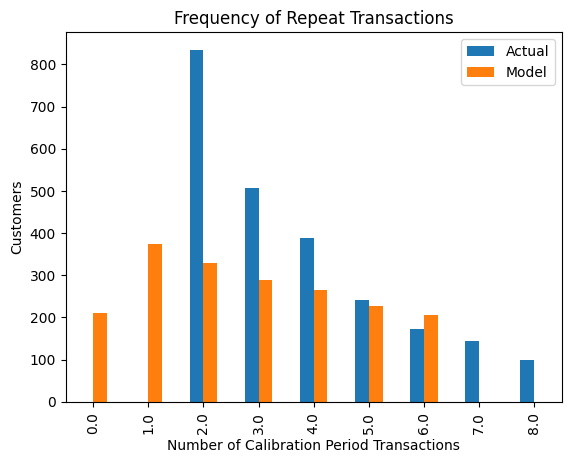

In [25]:
# Evaluation of forecast results
plot_period_transactions(bgf)
plt.show()

<a id='10'></a>
## Gamma Gamma Model Setup 
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#9)
<br>
> Next [Content](#11)  

In [26]:
# Created Model Object
ggf = GammaGammaFitter(penalizer_coef=0.01)

# Model Fitting
ggf.fit(cltv['Frequency'], cltv['Monetary'])

<lifetimes.GammaGammaFitter: fitted with 2845 subjects, p: 3.79, q: 0.34, v: 3.72>

In [27]:
# Expected average profit
cltv["Expected_average_profit"] = ggf.conditional_expected_average_profit(cltv['Frequency'], cltv['Monetary'])

In [28]:
cltv.head()

,Recency,T,Frequency,Monetary,Expected_purc_1_week,Expected_purc_1_month,Expected_average_profit
Customer ID,,,,,,,
12347,52.143,52.571,7,615.714,0.141,0.564,631.976
12348,40.286,51.286,4,449.310,0.092,0.367,470.746
12352,37.143,42.429,8,247.421,0.182,0.727,253.406
12356,43.143,46.571,3,937.143,0.086,0.344,996.244
12358,21.286,21.571,2,584.030,0.122,0.486,641.803


<a id='11'></a>
## CLTV Calculation with BG-NBD & GG Model 
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#10)
<br>
> Next [Content](#12)  


In [29]:
# 3-month Customer Lifetime Value
clv = ggf.customer_lifetime_value(bgf, # BG-NBD Model
                                  cltv['Frequency'],
                                  cltv['Recency'],
                                  cltv['T'],
                                  cltv['Monetary'],
                                  time=3,  # 3 months
                                  freq="W",  # Frequency information of T
                                  discount_rate=0.01)

In [30]:
clv = clv.reset_index()
clv.head()

,Customer ID,clv
0,12347,1128.562
1,12348,546.942
2,12352,583.126
3,12356,1083.357
4,12358,981.819


In [31]:
cltv_final = cltv.merge(clv, on="Customer ID", how="left")

In [32]:
cltv_final.sort_values(by="clv", ascending=False).head(10)

,Customer ID,Recency,T,Frequency,Monetary,Expected_purc_1_week,Expected_purc_1_month,Expected_average_profit,clv
1122,14646,50.429,50.714,73,3795.639,1.206,4.812,3804.771,58028.125
2761,18102,52.286,52.571,60,4327.622,0.969,3.864,4340.287,53160.523
2458,17450,51.286,52.571,46,4153.612,0.747,2.982,4169.486,39408.729
843,14096,13.857,14.571,17,3214.077,0.729,2.896,3247.581,29526.664
36,12415,44.714,48.286,21,5936.623,0.380,1.514,5986.468,28712.899
1257,14911,53.143,53.429,201,699.499,3.126,12.472,700.125,27685.788
874,14156,51.571,53.143,55,2133.647,0.877,3.500,2140.496,23754.462
1754,16000,0.000,0.429,3,4131.233,0.422,1.664,4387.276,22560.744
2487,17511,52.857,53.429,31,2937.496,0.509,2.030,2954.220,19010.035
2075,16684,50.429,51.286,28,2380.484,0.478,1.907,2395.524,14477.739


<a id='12'></a>
## CLTV Segmentation 
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#11)
<br>
> Next [Content](#13)  

In [33]:
cltv_final["Segment"] = pd.qcut(cltv_final["clv"], 4, labels=["D","C","B","A"])

In [34]:
cltv_final.head()

,Customer ID,Recency,T,Frequency,Monetary,Expected_purc_1_week,Expected_purc_1_month,Expected_average_profit,clv,Segment
0,12347,52.143,52.571,7,615.714,0.141,0.564,631.976,1128.562,A
1,12348,40.286,51.286,4,449.310,0.092,0.367,470.746,546.942,B
2,12352,37.143,42.429,8,247.421,0.182,0.727,253.406,583.126,B
3,12356,43.143,46.571,3,937.143,0.086,0.344,996.244,1083.357,A
4,12358,21.286,21.571,2,584.030,0.122,0.486,641.803,981.819,A


In [35]:
cltv_final.groupby("Segment").agg(
    {"count", "mean", "sum"}
)

Customer ID                     Recency                      T  \
              count       sum      mean   count       sum   mean count   
Segment                                                                  
D               712  11078423 15559.583     712 15771.714 22.151   712   
C               711  10885650 15310.338     711 21794.714 30.654   711   
B               711  10911380 15346.526     711 20876.714 29.362   711   
A               711  10630758 14951.840     711 22397.714 31.502   711   

                         Frequency              Monetary                     \
              sum   mean     count   sum   mean    count        sum    mean   
Segment                                                                       
D       28775.714 40.415       712  2185  3.069      712 131061.004 184.074   
C       27122.000 38.146       711  2911  4.094      711 198957.521 279.828   
B       24707.000 34.750       711  3865  5.436      711 267813.810 376.672   
A       24572.571 34.561       711  8078 11.361      711 492787.968 693.091   

        Expected_purc_1_week               Expected_purc_1_month          \
                       count     sum  mean                 count     sum   
Segment                                                                    
D                        712  50.937 0.072                   712 202.859   
C                        711  85.763 0.121                   711 341.520   
B                        711 115.222 0.162                   711 458.558   
A                        711 194.405 0.273                   711 773.956   

              Expected_average_profit                      clv              \
         mean                   count        sum    mean count         sum   
Segment                                                                      
D       0.285                     712 142126.930 199.616   712  103701.742   
C       0.480                     711 212406.820 298.744   711  273760.806   
B       0.645                     711 282573.948 397.432   711  493160.100   
A       1.089                     711 512488.256 720.799   711 1655127.539   

                  
            mean  
Segment           
D        145.649  
C        385.036  
B        693.615  
A       2327.887

<a id='13'></a>
## Conclusion 
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#12)